In [51]:
import numpy as np
import pandas
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

seaborn.set() # Set default seaborn graphics

# Regression Functions

In [28]:
def goodness_fit(x_train, x_test, y_train, y_test , y_train_predict, y_test_predict , linreg):
    print('Goodness Fit of Model (Train Data)')
    print(f'Explained Variance (R^2): {linreg.score(x_train,y_train)}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_train,y_train_predict)}\n')

    print('Goodness Fit of Model (Test Data)')
    print(f'Explained Variance (R^2): {linreg.score(x_test,y_test)}')
    print(f'Mean Squared Error (MSE): {mean_squared_error(y_test,y_test_predict)}')

In [29]:
# Lets make all of this into a function:   (Work Smarter Not Harder)
def RegressionModel(x_train,x_test,y_train,y_test):
    
    linreg = LinearRegression()
    linreg.fit(x_train,y_train)
    
    print(f'Coefficient a: {linreg.coef_}')
    print(f'Intercept b: {linreg.intercept_}\n')
    
    y_train_predict = linreg.predict(x_train)
    y_test_predict = linreg.predict(x_test)
    
    goodness_fit(x_train, x_test, y_train, y_test , y_train_predict, y_test_predict , linreg)
    
    f,axes = plt.subplots(2,2,figsize = (32,16))
    
    # X against Y
    axes[0,0].scatter(x_train,y_train)
    axes[0,0].plot(x_train,y_train_predict ,'r' , linewidth = 1)
    axes[0,0].set_xlabel(f'{x_train.columns[0]} (Train)')
    axes[0,0].set_ylabel(f'{y_train.columns[0]} (Train)')

    axes[0,1].scatter(x_test,y_test , color="g")
    axes[0,1].plot(x_test,y_test_predict , 'r')
    axes[0,1].set_xlabel(f'{x_train.columns[0]} (Test)')
    axes[0,1].set_ylabel(f'{y_train.columns[0]} (Test)')
    
    # Y Predicted against Y Actual
    axes[1,0].scatter(y_train,y_train_predict)
    axes[1,0].plot(y_train,y_train ,'r' , linewidth = 1)
    axes[1,0].set_xlabel('True Values of the Response Variable (Train)')
    axes[1,0].set_ylabel('Predicted Values of the Response Variable (Train)')

    axes[1,1].scatter(y_test,y_test_predict , color="g")
    axes[1,1].plot(y_test,y_test , 'r')
    axes[1,1].set_xlabel('True Values of the Response Variable (Test)')
    axes[1,1].set_ylabel('Predicted Values of the Response Variable (Test)')

# Outlier Functions

In [30]:
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers

In [31]:
# This function gets the value of the whiskers of a Data Frame when represented in the form of a box plot

def get_whiskers(data_frame):
    q1 = data_frame.quantile(0.25)
    q3 = data_frame.quantile(0.75)
    IQR = q3 - q1
    whisker1 = q1-1.5*IQR
    whisker2 = q3 + 1.5*IQR
    return whisker1,whisker2

In [32]:
# This function removes the outliers in the a DataFrame

def remove_outliers_1(data_frame):
    outlier = False

    for var in data_frame.columns:
        whisker1,whisker2 = get_whiskers(data_frame[var])
        row_num = 0;
        for element in data_frame[var]:
            if element<whisker1 or element>whisker2:
                data_frame.drop(row_num,inplace=True)
                data_frame.reset_index(drop=True , inplace=True)
                row_num-=1
            row_num+=1
        print(len(data_frame))
    return data_frame

In [ ]:
# This the updated version of the remove_outliers. It uses std instead of th whiskers in a boxplot
def remove_outliers_2(data_frame):

    for var in data_frame.columns:
        std = data_frame[var].std()
        limit = 3.5*std
        mean = data_frame[var].mean()
        row_num = 0;
        for element in data_frame[var]:
            if element<(mean-limit) or element>(mean+limit):
                data_frame.drop(row_num,inplace=True)
                data_frame.reset_index(drop=True , inplace=True)
                row_num-=1
            row_num+=1
    return data_frame

# Descision Tree Functions

In [34]:
# A CONFUSION MATRIX FUNCTION

def confusion_matrix_func(x_train,x_test,y_train,y_test,depth):
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = depth)  # create the decision tree object
    dectree.fit(x_train, y_train)                    # train the decision tree model

    # Predict Legendary values corresponding to Total
    y_train_pred = dectree.predict(x_train)
    y_test_pred = dectree.predict(x_test)
    
    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy: ", dectree.score(x_train, y_train))
    matrix = confusion_matrix(y_train,y_train_pred) 
    print(f"True Positive Rate: {matrix[1,1]/(matrix[1,1] + matrix[1,0])} ")
    print(f"False Positive Rate: {matrix[0,1]/(matrix[0,0] + matrix[0,1])} ")
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy: ", dectree.score(x_test, y_test))
    matrix = confusion_matrix(y_test,y_test_pred) 
    print(f"True Positive Rate: {matrix[1,1]/(matrix[1,1] + matrix[1,0])} ")
    print(f"False Positive Rate: {matrix[0,1]/(matrix[0,0] + matrix[0,1])} ")
    print()

    # Plot the Confusion Matrix for Train and Test
    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    seaborn.heatmap(confusion_matrix(y_train, y_train_pred),
               annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    seaborn.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [4]:
credit_approval = pandas.read_csv("credit-approval_csv.csv")
credit_approval.head()

,Gender,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved,Approved_Status
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,+,Approved
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,+,Approved
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,+,Approved
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,+,Approved
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,+,Approved


In [5]:
print(f'Data type: {type(credit_approval)} ')
print(f'Data Dims: {credit_approval.shape}')

Data type: <class 'pandas.core.frame.DataFrame'> 
Data Dims: (690, 17)


In [6]:
print(f'{credit_approval.dtypes}')

Gender              object
Age                float64
Debt               float64
Married             object
BankCustomer        object
EducationLevel      object
Ethnicity           object
YearsEmployed      float64
PriorDefault        object
Employed            object
CreditScore          int64
DriversLicense      object
Citizen             object
ZipCode            float64
Income               int64
Approved            object
Approved_Status     object
dtype: object


In [11]:
age = pandas.DataFrame(credit_approval['Age'])
debt = pandas.DataFrame(credit_approval['Debt'])
years_employed = pandas.DataFrame(credit_approval['YearsEmployed'])
credit_score = pandas.DataFrame(credit_approval['CreditScore'])
income = pandas.DataFrame(credit_approval['Income'])

In [12]:
data_list = [age,debt,years_employed,credit_score,income]

In [26]:
for data in data_list:
    print(f'{data.describe()}',end = '\n\n')
    print('---------------------------------------------------------------------------------\n')

              Age
count  678.000000
mean    31.568171
std     11.957862
min     13.750000
25%     22.602500
50%     28.460000
75%     38.230000
max     80.250000

---------------------------------------------------------------------------------

             Debt
count  690.000000
mean     4.758725
std      4.978163
min      0.000000
25%      1.000000
50%      2.750000
75%      7.207500
max     28.000000

---------------------------------------------------------------------------------

       YearsEmployed
count     690.000000
mean        2.223406
std         3.346513
min         0.000000
25%         0.165000
50%         1.000000
75%         2.625000
max        28.500000

---------------------------------------------------------------------------------

       CreditScore
count    690.00000
mean       2.40000
std        4.86294
min        0.00000
25%        0.00000
50%        0.00000
75%        3.00000
max       67.00000

---------------------------------------------------------------

In [38]:
age_approved = pandas.DataFrame(credit_approval[['Age','Debt','Approved_Status']])

<AxesSubplot:xlabel='Age', ylabel='Approved_Status'>

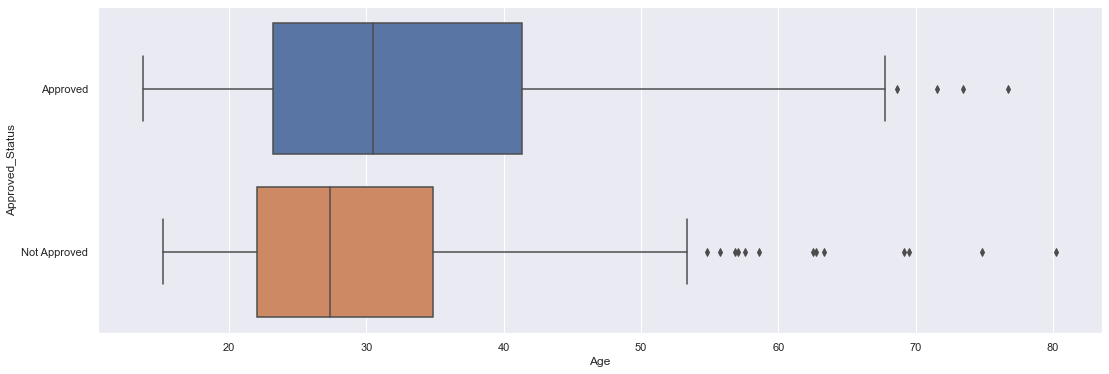

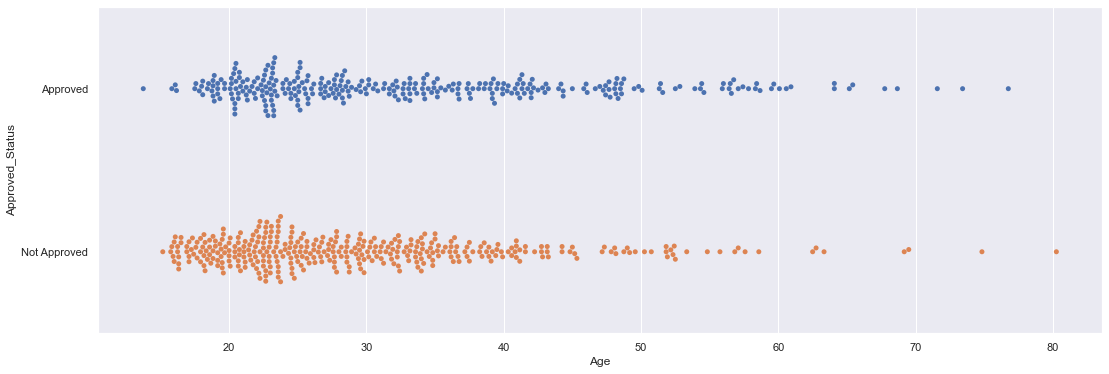

In [41]:
f = plt.figure(figsize = (18,6))
seaborn.boxplot(x = "Age", y = "Approved_Status", data = age_approved, orient = "h")

f = plt.figure(figsize=(18, 6))
seaborn.swarmplot(x = "Age", y = "Approved_Status", data = age_approved, orient = "h")

<AxesSubplot:xlabel='Debt', ylabel='Approved_Status'>

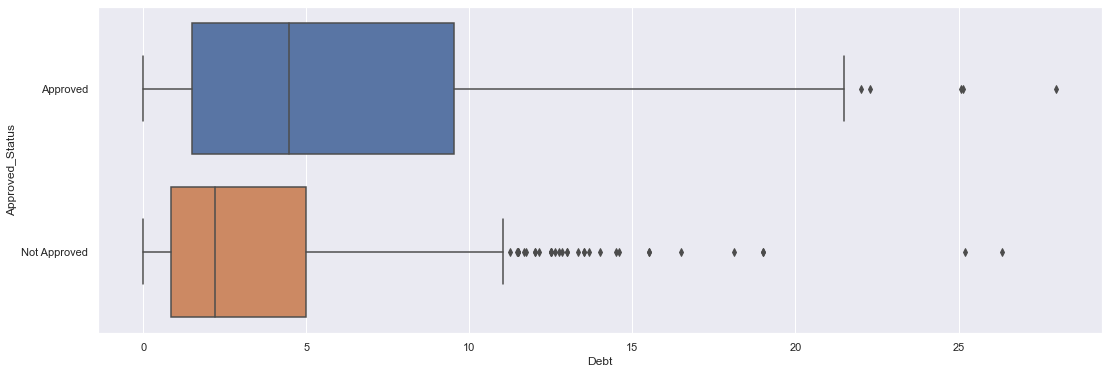

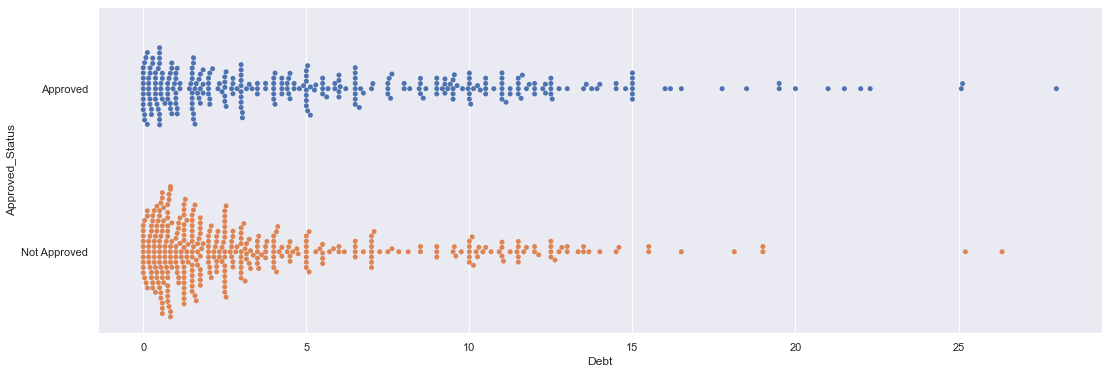

In [42]:
f = plt.figure(figsize = (18,6))
seaborn.boxplot(x = "Debt", y = "Approved_Status", data = age_approved, orient = "h")

f = plt.figure(figsize=(18, 6))
seaborn.swarmplot(x = "Debt", y = "Approved_Status", data = age_approved, orient = "h")

In [47]:
creditcardData = pandas.read_csv('credit-approval_csv.csv')
creditcardDataInt = creditcardData.loc[:, creditcardData.dtypes == np.int64]
creditcardDataInt.describe()

,CreditScore,Income
count,690.00000,690.000000
mean,2.40000,1017.385507
std,4.86294,5210.102598
min,0.00000,0.000000
25%,0.00000,0.000000
50%,0.00000,5.000000
75%,3.00000,395.500000
max,67.00000,100000.000000


<AxesSubplot:>

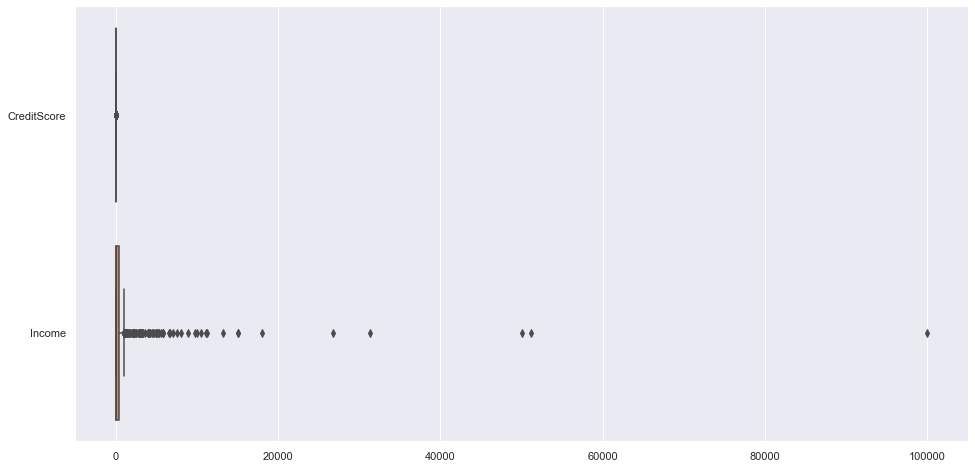

In [56]:
# Draw the Boxplots of all variables
f = plt.figure(figsize=(16, 8))
sb.boxplot(data = creditcardDataInt, orient = "h")

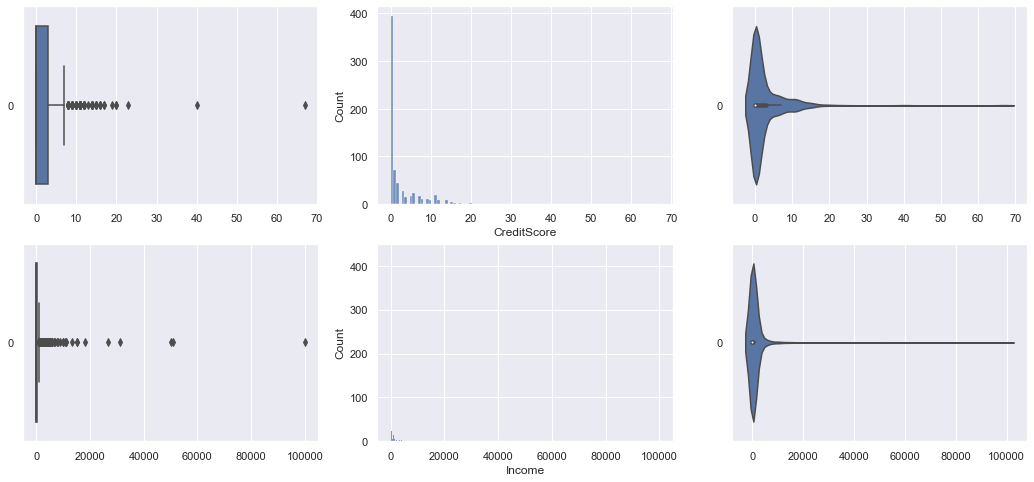

In [60]:
# Draw the distributions of all variables
f, axes = plt.subplots(2, 3, figsize=(18, 8))

count = 0
for var in creditcardDataInt:
    sb.boxplot(data = creditcardDataInt[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = creditcardDataInt[var], ax = axes[count,1])
    sb.violinplot(data = creditcardDataInt[var], orient = "h", ax = axes[count,2])
    count += 1

In [48]:
creditcardDataFlt = creditcardData.loc[:, creditcardData.dtypes == np.float64]
creditcardDataFlt.describe()

,Age,Debt,YearsEmployed,ZipCode
count,678.000000,690.000000,690.000000,677.000000
mean,31.568171,4.758725,2.223406,184.014771
std,11.957862,4.978163,3.346513,173.806768
min,13.750000,0.000000,0.000000,0.000000
25%,22.602500,1.000000,0.165000,75.000000
50%,28.460000,2.750000,1.000000,160.000000
75%,38.230000,7.207500,2.625000,276.000000
max,80.250000,28.000000,28.500000,2000.000000


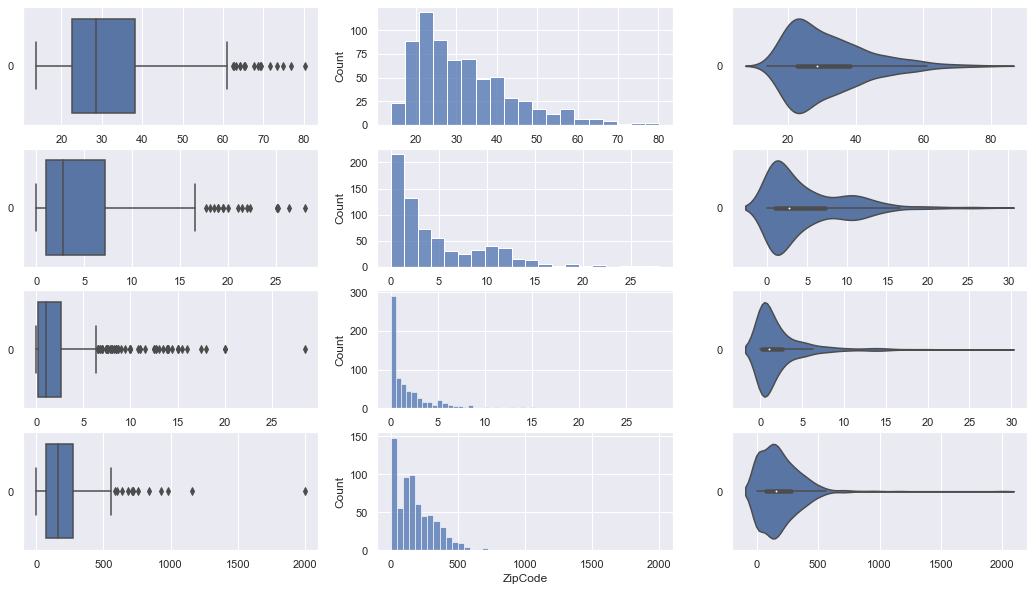

In [67]:
# Draw the distributions of all variables
f, axes = plt.subplots(4, 3, figsize=(18, 10))

count = 0
for var in creditcardDataFlt:
    sb.boxplot(data = creditcardDataFlt[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = creditcardDataFlt[var], ax = axes[count,1])
    sb.violinplot(data = creditcardDataFlt[var], orient = "h", ax = axes[count,2])
    count += 1

In [49]:
creditcardDataStr = creditcardData.loc[:, creditcardData.dtypes == object]
creditcardDataStr.describe()

,Gender,Married,BankCustomer,EducationLevel,Ethnicity,PriorDefault,Employed,DriversLicense,Citizen,Approved,Approved_Status
count,678,684,684,681,681,690,690,690,690,690,690
unique,2,3,3,14,9,2,2,2,3,2,2
top,b,u,g,c,v,t,f,f,g,-,Not Approved
freq,468,519,519,137,399,361,395,374,625,383,383


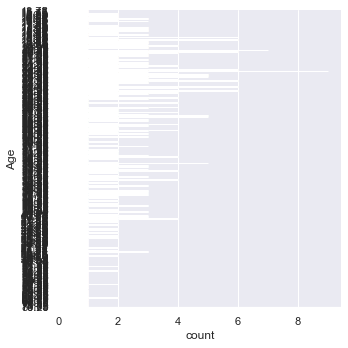

In [72]:
sb.catplot(y="",data=creditcardData,kind="count")